In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carrega a base de dados
from google.colab import files
uploaded = files.upload()

Saving estudo_caso_02.csv to estudo_caso_02.csv


## Regressão linear simples

In [4]:
data = pd.read_csv('estudo_caso_02.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<Axes: >

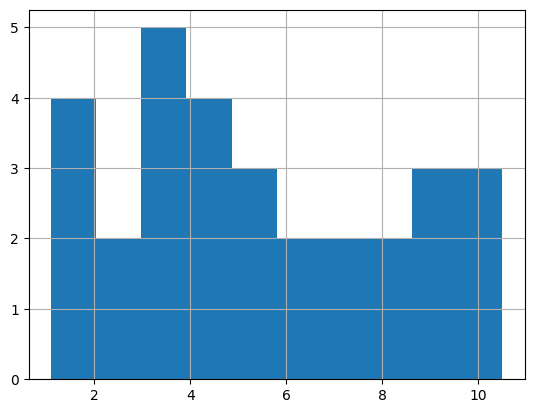

In [8]:
data['YearsExperience'].hist()

<Axes: >

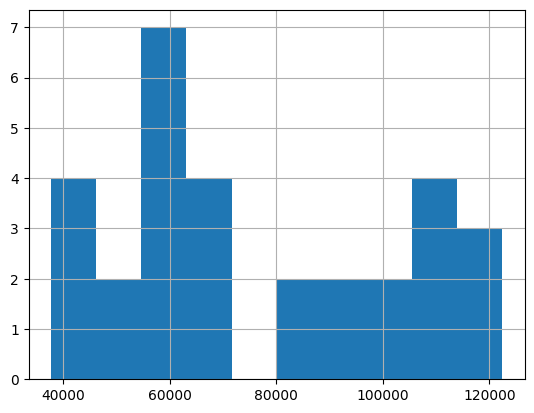

In [7]:
data['Salary'].hist()

In [10]:
data.describe(include = 'all')

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Text(0, 0.5, 'Salário')

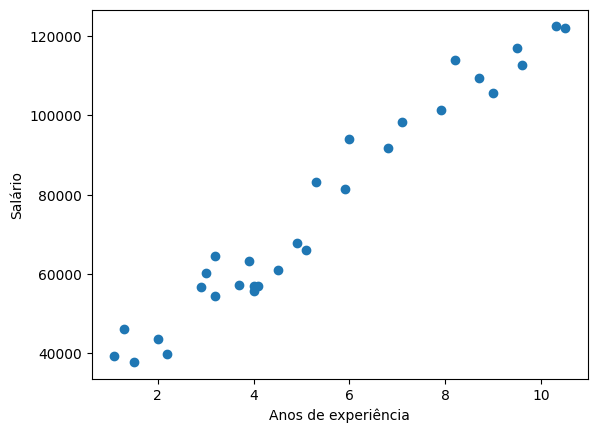

In [12]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('Anos de experiência')
plt.ylabel('Salário')

In [13]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [14]:
pip install statsmodels

In [15]:
import statsmodels.api as sm

In [20]:
model = sm.OLS(data['Salary'], data['YearsExperience']).fit()

In [21]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                    2.56e-24
Time:                        02:22:49   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

## Regressão linear múltipla

In [1]:
# Carrega a base de dados
from google.colab import files
uploaded = files.upload()

Saving enem_2019_tratado.csv to enem_2019_tratado.csv


In [6]:
enem = pd.read_csv('enem_2019_tratado.csv', sep=',', encoding = 'iso-8859-1')

### Análise Inicial

#### Objetivo: Criar um modelo matemático de regressão linear múltipla para prever a nota da redação sendo como variáveis independentes as notas de seus componentes

In [5]:
enem.head(30)

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim
5,"1,90E+11",São José do Rio Preto,18,F,1,branca,1,2,pública,35028927.0,...,612.8,Espanhol,1.0,120.0,160.0,120.0,80.0,100.0,580.0,Não
6,"1,90E+11",Franca,32,M,1,parda,1,1,não_respondeu,NaN,...,584.1,Espanhol,1.0,120.0,120.0,120.0,120.0,100.0,580.0,Sim
7,"1,90E+11",Santo André,20,F,1,parda,1,1,não_respondeu,NaN,...,508.5,Espanhol,1.0,120.0,120.0,120.0,100.0,80.0,540.0,Sim
8,"1,90E+11",São Paulo,26,M,1,branca,1,1,não_respondeu,NaN,...,681.2,Espanhol,1.0,180.0,200.0,200.0,200.0,120.0,900.0,Sim
9,"1,90E+11",Santo André,44,F,2,parda,1,1,não_respondeu,NaN,...,488.1,Espanhol,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim


In [7]:
enem.columns

Index(['NU_INSCRICAO', 'NO_MUNICIPIO_RESIDENCIA', 'IDADE', 'SEXO',
       'TP_ESTADO_CIVIL', 'RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'ESCOLA', 'CO_ESCOLA', 'NO_MUNICIPIO_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NOTA_CN',
       'NOTA_CH', 'NOTA_LC', 'NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'COMP1', 'COMP2', 'COMP3', 'COMP4', 'COMP5', 'NOTA_REDACAO',
       'INTERNET'],
      dtype='object')

In [8]:
enem.shape

(499940, 28)

#### Selecionando apenas um dos colégios

In [10]:
colegio = enem.loc[enem.CO_ESCOLA == 35132287]

In [11]:
colegio.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,49.1,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,930.5,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,663.9,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,771.9,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,663.1,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


In [12]:
colegio.shape

(130, 28)

#### Valores Missing

In [13]:
colegio.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

### Regressão múltipla com statsmodel

In [14]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [15]:
variaveis = colegio[['NOTA_REDACAO', 'COMP2', 'COMP4', 'COMP5']]

In [16]:
variaveis.corr()

,NOTA_REDACAO,COMP2,COMP4,COMP5
NOTA_REDACAO,1.000000,0.725277,0.785098,0.675253
COMP2,0.725277,1.000000,0.375906,0.298434
COMP4,0.785098,0.375906,1.000000,0.428872
COMP5,0.675253,0.298434,0.428872,1.000000


In [17]:
modelo = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4 + COMP5', data = colegio).fit()

In [18]:
residuos = modelo.resid
residuos

17        -4.498054
10760     33.309358
13315     -5.718021
20006    -26.432059
26697      1.349594
            ...    
426829    35.760528
428241   -17.683137
443242   -17.497499
462446   -56.783460
483420    34.529325
Length: 130, dtype: float64

#### Teste de Normalidade dos resíduos

- H0 = distribuição normal p > 0.05
- Ha = distribuição != normal p < 0.05

In [21]:
import scipy.stats as stats

In [23]:
estatistica, p = stats.shapiro(residuos)
print(estatistica, p)

0.9847341775894165 0.15436169505119324


In [25]:
# Resíduos possuem a distribuição normal p >= 0.05

In [26]:
import matplotlib.pyplot as plt

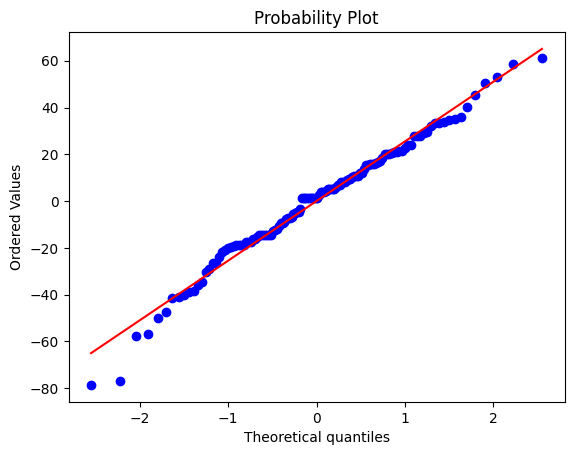

In [29]:
stats.probplot(residuos, dist = 'norm', plot=plt)
plt.show()

#### Análise de Homocedastidade dos resíduos

(Resíduos com variação constante)

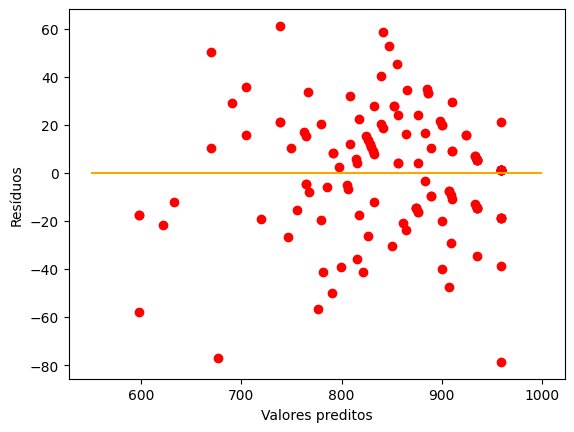

In [33]:
plt.scatter(y=residuos, x=modelo.predict(), color='red')
plt.hlines(y = 0, xmin=550, xmax=1000, color = 'orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores preditos')
plt.show()

##### Teste Breusch-Pagan (Homocedastidade ou Heterocedastidade)

- H0 = existe homocedastidade p > 0.05
- Ha = nãooo existe homocedastidade p < 0.05

In [34]:
from statsmodels.compat import lzip

In [36]:
estatistica, p, f, fp = sms.het_breuschpagan(modelo.resid, modelo.model.exog)

In [37]:
print(estatistica, p)

7.939832568694114 0.047271689874476004


In [38]:
# Não existe homocedasticidade

#### Outliers nos resíduos

(Entre -3 e 3)

In [39]:
outliers = modelo.outlier_test()

In [41]:
outliers.min()

student_resid   -3.260297
unadj_p          0.001434
bonf(p)          0.186452
dtype: float64

In [44]:
# Como o valor é menor que -3 mas não acaba ultrapassando muito
# consideramos como um outlier não muito excedente para considerar como
# um problema para o modelo

In [42]:
outliers.max()

student_resid    2.466219
unadj_p          0.957876
bonf(p)          1.000000
dtype: float64

#### Ausência de multicolinearidade

Somente entre as variáveis independentes

Considerando multicolinearidade quando correlação >= 0.9

In [45]:
variaveis = colegio[['COMP2', 'COMP4', 'COMP5']]
correlacoes = variaveis.corr()

In [46]:
correlacoes

,COMP2,COMP4,COMP5
COMP2,1.000000,0.375906,0.298434
COMP4,0.375906,1.000000,0.428872
COMP5,0.298434,0.428872,1.000000


Usando fator de inflação de variância

VIFj = 1 / (1 - Rj²)

Esse valor deve ser menor que 5

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [49]:
vif = add_constant(variaveis) # função espera a presença de uma constante na matriz de variáveis ​​explicativas
pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns)

const    72.466982
COMP2     1.196714
COMP4     1.335832
COMP5     1.259221
dtype: float64

In [51]:
# Como são todas menores que 5, entende-se que não existe um problema de multicolinearidade

In [50]:
vif

,const,COMP2,COMP4,COMP5
17,1.0,140.0,160.0,160.0
10760,1.0,200.0,200.0,140.0
13315,1.0,140.0,200.0,120.0
20006,1.0,180.0,180.0,140.0
26697,1.0,200.0,200.0,200.0
...,...,...,...,...
426829,1.0,120.0,140.0,160.0
428241,1.0,120.0,120.0,100.0
443242,1.0,200.0,160.0,140.0
462446,1.0,160.0,180.0,120.0


#### Análise do modelo

Intercept e Coeficiente

p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

Adjusted R-squared (explicação do modelo através dos dados).

p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [52]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     507.2
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           3.97e-70
Time:                        20:43:28   Log-Likelihood:                -604.30
No. Observations:                 130   AIC:                             1217.
Df Residuals:                     126   BIC:                             1228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.1987     19.162      6.064      0.0


**Equação:** Nota Redação = 116,1987 + 1,2831.COMP2 + 1,7298.COMP4 + 1,1993.COMP5

In [54]:
# Criando uma coluna de previsão
colegio['previsao'] = modelo.fittedvalues

<ipython-input-54-0f8e061506f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegio['previsao'] = modelo.fittedvalues


In [56]:
colegio.head(10)

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsao
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,764.498054
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,886.690642
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,785.718021
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,826.432059
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,958.650406
26911,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,120.0,160.0,160.0,180.0,780.0,Sim,762.822631
43814,"1,90E+11",São Paulo,18,M,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,160.0,160.0,140.0,180.0,800.0,Sim,779.550082
43870,"1,90E+11",São Paulo,17,F,1,preta,2,2,privada,35132287.0,...,Inglês,1.0,140.0,200.0,160.0,180.0,180.0,860.0,Sim,900.067246
44150,"1,90E+11",São Paulo,17,F,1,amarela,1,2,privada,35132287.0,...,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,958.650406
48417,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,140.0,120.0,140.0,120.0,160.0,680.0,Sim,669.642901


## **MODELO 2**

In [57]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [59]:
# Criação do modelo
modelo2 = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4', data = colegio).fit()

In [60]:
residuos2 = modelo2.resid
residuos2

17         -5.800864
10760     -19.726164
13315     -73.382235
20006     -67.154169
26697      20.273836
             ...    
426829     46.771131
428241    -69.438183
443242    -52.144793
462446   -118.372859
483420     47.855207
Length: 130, dtype: float64

### Teste de Normalidade dos resíduos

In [61]:
import scipy.stats as stats

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [62]:
estatistica, p = stats.shapiro(residuos2)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9847795367240906
p-valor: 0.15595780313014984


In [63]:
import matplotlib.pyplot as plt

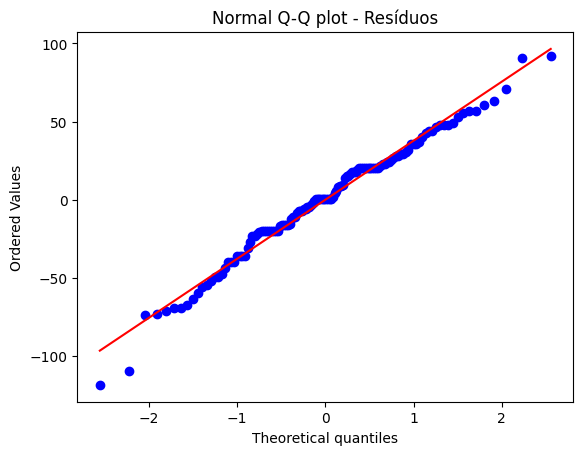

In [64]:
stats.probplot(residuos2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

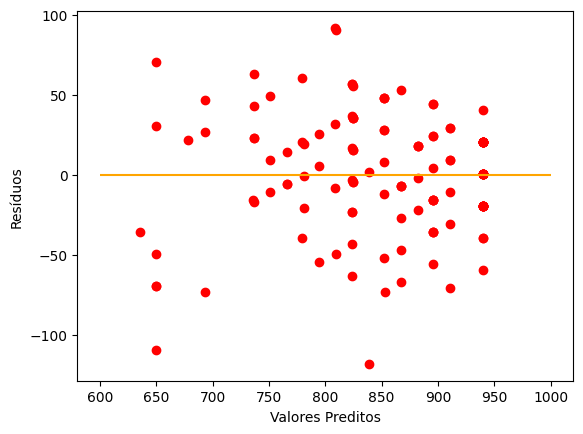

In [65]:
plt.scatter(y=residuos2, x=modelo2.predict(), color='red')
plt.hlines(y=0, xmin=600, xmax=1000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [66]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [67]:
estatistica, p, f, fp = sms.het_breuschpagan (modelo2.resid, modelo2.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 15.042745745701497
p-valor: 0.0005413887974310043
f-valor: 8.309300366021285
f_p-valor: 0.00040612282224010204


### **Outliers nos resíduos**

In [68]:
outliers = modelo2.outlier_test()

In [69]:
outliers.max()

student_resid    2.521846
unadj_p          0.994221
bonf(p)          1.000000
dtype: float64

In [70]:
outliers.min()

student_resid   -3.254277
unadj_p          0.001460
bonf(p)          0.189769
dtype: float64

### **Independência dos resíduos (Durbin-Watson)**
ideal para medidas repetidas (longitudinais: Ex: mesmo aluno)

A estatística de teste é aproximadamente igual a 2 * (1-r) onde r é a autocorrelação da amostra dos resíduos. Assim, para r = 0, a estatística de teste é igual a 2, indicando independência dos resíduos (o resultado vai de 0 a 4).

In [72]:
import statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning

In [73]:
estatistica = statsmodels.stats.stattools.durbin_watson(modelo2.resid)
print('Estatística de teste: {}'.format(estatistica))

Estatística de teste: 1.7307261063145127


### **Ausência de Multicolinearidade**

Somente entre as variáveis independentes.

Considerada multicolinearidade quando r > 0.9.

In [75]:
variaveis2 = colegio[['COMP2','COMP4']]

In [76]:
variaveis2.head()

,COMP2,COMP4
17,140.0,160.0
10760,200.0,200.0
13315,140.0,200.0
20006,180.0,180.0
26697,200.0,200.0


In [77]:
correlacoes = variaveis2.corr(method='pearson')
correlacoes

,COMP2,COMP4
COMP2,1.000000,0.375906
COMP4,0.375906,1.000000


Usando fator de inflação de variância

VIFj = 1 / (1 - Rj²)

Esse valor deve ser menor que 5

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [79]:
vif = add_constant(variaveis2) # função espera a presença de uma constante na matriz de variáveis ​​explicativas
pd.Series([variance_inflation_factor(vif.values, i) for i in range(vif.shape[1])], index=vif.columns)

const    59.966319
COMP2     1.164559
COMP4     1.164559
dtype: float64

### **Análise do Modelo**

Análise do modelo

Intercept

p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

Adjusted R-squared (explicação do modelo através dos dados).

p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [80]:
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     314.2
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           6.76e-50
Time:                        20:55:33   Log-Likelihood:                -655.51
No. Observations:                 130   AIC:                             1317.
Df Residuals:                     127   BIC:                             1326.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    214.0062     25.745      8.313      0.0

**Equação:** Nota Redação = 214,0062 + 1,4391.COMP2 + 2,1895.COMP4

In [81]:
# Criando uma coluna com previsão
colegio['previsao2'] = modelo2.fittedvalues

<ipython-input-81-b29c8b50d61d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegio['previsao2'] = modelo2.fittedvalues


In [82]:
colegio.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsao,previsao2
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,764.498054,765.800864
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,886.690642,939.726164
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,785.718021,853.382235
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,826.432059,867.154169
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,958.650406,939.726164


### **COMPARAÇÃO ENTRE MODELOS**

**Critério de Informação de Akaike (AIC)**

O melhor modelo é com resultado menor (menor variação dos resíduos)

In [85]:
modelo.aic

1216.59304638052

In [84]:
modelo2.aic

1317.0150160308585

In [86]:
# O melhor modelo por essa métrica é o modelo 1

**Critério de Informação Bayesiano (BIC)**

O melhor modelo é com resultado menor (menor variação dos resíduos)

In [87]:
modelo.bic

1228.0631841823424

In [88]:
modelo2.bic

1325.6176193822253

In [89]:
# O melhor modelo por essa métrica é o modelo 1

**Coeficiente de determinação (R^2)**

In [91]:
modelo.rsquared_adj

0.9217065323901117

In [92]:
modelo2.rsquared_adj

0.829212465222195

## **REGRESSÃO MÚLTIPLA COM SCIKIT-LEARN**

## **MODELO 3**

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
independente = colegio[['COMP2','COMP4','COMP5']]


In [95]:
independente

,COMP2,COMP4,COMP5
17,140.0,160.0,160.0
10760,200.0,200.0,140.0
13315,140.0,200.0,120.0
20006,180.0,180.0,140.0
26697,200.0,200.0,200.0
...,...,...,...
426829,120.0,140.0,160.0
428241,120.0,120.0,100.0
443242,200.0,160.0,140.0
462446,160.0,180.0,120.0


In [97]:
dependente = colegio[['NOTA_REDACAO']]

In [98]:
dependente

,NOTA_REDACAO
17,760.0
10760,920.0
13315,780.0
20006,800.0
26697,960.0
...,...
426829,740.0
428241,580.0
443242,800.0
462446,720.0


In [99]:
modelo3 = LinearRegression()
modelo3.fit(independente, dependente)

LinearRegression()

In [100]:
modelo3.intercept_

array([116.19870292])

In [101]:
modelo3.coef_

array([[1.28310055, 1.72982856, 1.1993294 ]])

In [102]:
print("Equação: NOTA REDAÇÃO = {:.2f} + {:.2f}*COMP2 + {:.2f}*COMP4 + {:.2f}*COMP5".format(modelo3.intercept_[0], modelo3.coef_[0][0], modelo3.coef_[0][1], modelo3.coef_[0][2]))

Equação: NOTA REDAÇÃO = 116.20 + 1.28*COMP2 + 1.73*COMP4 + 1.20*COMP5


In [103]:
modelo3.score(independente, dependente)

0.9235273107066208

## **MODELO 4**

In [104]:
independente2 = colegio[['COMP2','COMP4']]

In [106]:
dependente2 = colegio[['NOTA_REDACAO']]

In [107]:
modelo4 = LinearRegression()
modelo4.fit(independente2, dependente2)

LinearRegression()

In [108]:
modelo4.intercept_

array([214.00621165])

In [109]:
modelo4.coef_

array([[1.43906548, 2.18953428]])

In [110]:
print("Equação: NOTA REDAÇÃO = {:.2f} + {:.2f}*COMP2 + {:.2f}*COMP4".format(modelo4.intercept_[0], modelo4.coef_[0][0], modelo4.coef_[0][1]))

Equação: NOTA REDAÇÃO = 214.01 + 1.44*COMP2 + 2.19*COMP4


In [111]:
modelo4.score(independente2, dependente2)

0.8318603339784402